    Calculating RMDS using RDKit and AllChem.AlignMol
    Author: Glauco Endrigo
    Researcher at Universidade federal do abc

#### Using rdkit, Chem  

In [16]:
from rdkit.Contrib.CalcLigRMSD.CalcLigRMSD import CalcLigRMSD
import pandas as pd
import os
import csv
from rdkit import Chem
from rdkit.Chem import AllChem
import torch
from tqdm import tqdm
from Bio import PDB
import numpy as np

In [17]:
%run ../Config.ipynb

In [18]:
config = Config()

#### Opening  

In [19]:
datos = pd.read_csv("../Datahub/Data/rmsd.csv")

In [20]:
datos['pdb'].nunique()

280

In [21]:
len(datos)

2537

In [22]:
datos.groupby(['pdb'])['poserank'].nunique().sort_values(ascending = False).value_counts().reset_index()

,index,poserank
0,10,190
1,9,51
2,1,7
3,6,6
4,5,6
5,8,5
6,7,5
7,3,4
8,4,3
9,2,3


In [23]:
datos[datos['pdb'] == '1a30']

,pdb,poserank,RMSD
577,1a30,1,5.40
578,1a30,2,9.04
579,1a30,3,6.84
580,1a30,4,7.84
581,1a30,5,6.18
582,1a30,6,4.11
583,1a30,7,8.16
584,1a30,8,2.80
585,1a30,9,9.83
586,1a30,10,7.69


#### Rmsd Analysis

In [24]:
best_rmsd = datos.sort_values(["pdb", "RMSD"]).drop_duplicates("pdb", keep = "first")

In [25]:
path_to_docked = "/home/lbcb02/Workspace/General data/docked/ex_50_bz_10_poses_10_v2"
lepton = pd.DataFrame(columns = ["pdb","class"])

for class_ in ["best","good","bad","verybad"]: 
    color_path = os.path.join(path_to_docked, class_)
    if os.path.exists(color_path):
        for pdb in os.listdir(color_path):
            lepton = lepton.append({"pdb":pdb, "class":class_}, ignore_index = True)
    else:
        print("Incorrect path")

In [26]:
merged_best = pd.merge(best_rmsd, lepton, on = ['pdb'], how = "inner")

In [27]:
merged_best.head()

,pdb,poserank,RMSD,class
0,1a30,8,2.80,verybad
1,1bcu,3,0.40,best
2,1bzc,1,0.62,good
3,1c5z,2,0.29,best
4,1e66,1,0.28,best


In [28]:
merged_best.groupby("class")['RMSD'].describe()['mean'].reset_index()

,class,mean
0,bad,1.145116
1,best,0.568981
2,good,1.021316
3,verybad,2.437857


#### RMSD 

<AxesSubplot:>

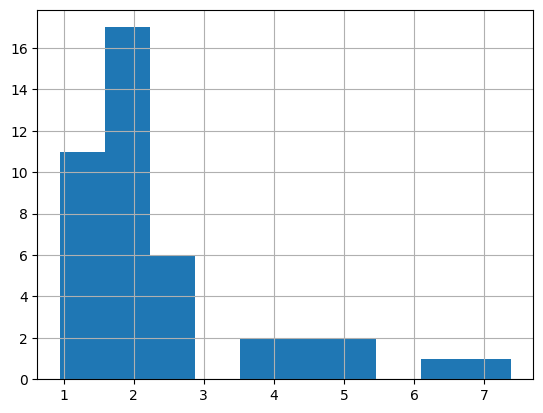

In [29]:
merged_best[merged_best['class']=='verybad']['RMSD'].hist()

In [30]:
merged = pd.merge(datos, lepton, on = ['pdb'], how = "inner")

<AxesSubplot:>

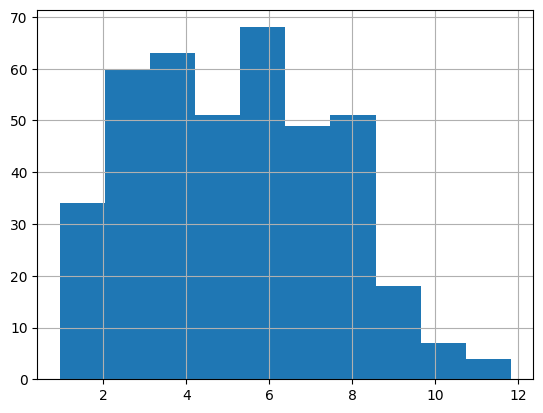

In [31]:
merged[merged['class']=='verybad']['RMSD'].hist()

#### Scores

In [41]:
score = pd.read_json("../Datahub/Data/score.json").unstack().reset_index().rename(columns = {"level_0":"pdb","level_1":"pose",0:"score"})

In [42]:
score_best = score.sort_values(["pdb", "score"]).drop_duplicates("pdb", keep = "last")

In [43]:
merged = pd.merge(score_best, lepton, on = ['pdb'], how = "inner")

In [44]:
merged[merged['pdb'] == '1a30']

,pdb,pose,score,class
0,1a30,8,45.901639,verybad


In [45]:
merged[merged['class'] == 'best'].head()

,pdb,pose,score,class
1,1bcu,1,92.424242,best
3,1c5z,1,62.637363,best
4,1e66,1,79.130435,best
5,1eby,1,82.125604,best
7,1gpk,1,80.808081,best


#### Gráficos de densidade 

In [34]:
import matplotlib.pyplot as plt

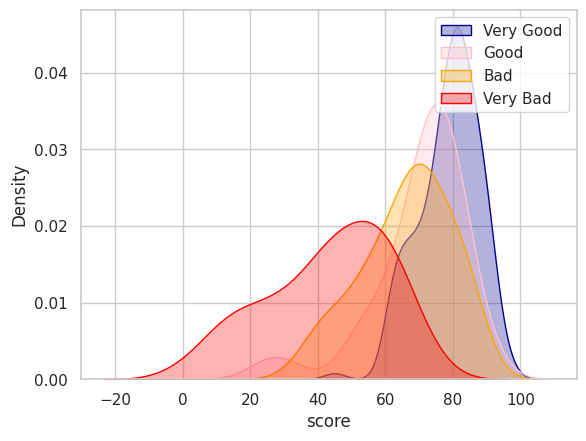

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots()

# Plot density plots for each class with increased transparency
sns.kdeplot(data=merged[merged['class'] == 'best'], x='score', fill=True, color='darkblue', alpha=0.3, ax=ax, label='Very Good')
sns.kdeplot(data=merged[merged['class'] == 'good'], x='score', fill=True, color='pink', alpha=0.3, ax=ax, label='Good')
sns.kdeplot(data=merged[merged['class'] == 'bad'], x='score', fill=True, color='orange', alpha=0.3, ax=ax, label='Bad')
sns.kdeplot(data=merged[merged['class'] == 'verybad'], x='score', fill=True, color='red', alpha=0.3, ax=ax, label='Very Bad')

# Show the legend
ax.legend()

# Display the plot
plt.show()


In [41]:
merged.groupby("class")['score'].describe().reset_index()[["class","min","max"]]

,class,min,max
0,bad,35.416667,86.000000
1,best,44.954128,96.396396
2,good,24.637681,90.265487
3,verybad,1.680672,70.967742


<font color = 'red'> Mostrar para orientadora!

In [42]:
(7 + 7 )/20 

0.7

In [43]:
(7 + 0 )/20 

0.35

 (score_rmsd * 1 + score_match * 1  )/20

| score | rmsd |
|-------|------|
| rmsd < 2 | -10 |
| 2 < rmsd < 3 | -7 |
| rmsd > 3 | 0 |

| score | match |
|-------|-------|
| 79 | -10 |
| 70 | -7 |
| 66 | 0 |
| 42 | 0 |
